<a href="https://colab.research.google.com/github/haricharanvihari/Employee-Attrition/blob/main/Employee_Attrition_Analysis_from_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Import Libraries

In [ ]:
#pip install pandas
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

In [ ]:
df_emp = pd.read_excel('/content/drive/My Drive/HR/Employee_Info.xlsx')

In [ ]:
df_emp.shape  #File is read successfully

(1470, 35)

In [ ]:
df_HR = df_emp.copy() #Copy of original source to a df

In [ ]:
#df_HR.columns  #list of columns available
df_HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df_HR.info() # To understand missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df_HR.columns.to_series().groupby(df_HR.dtypes).groups #Identify Group types

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [ ]:
df_HR.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Overview of the features in dataset

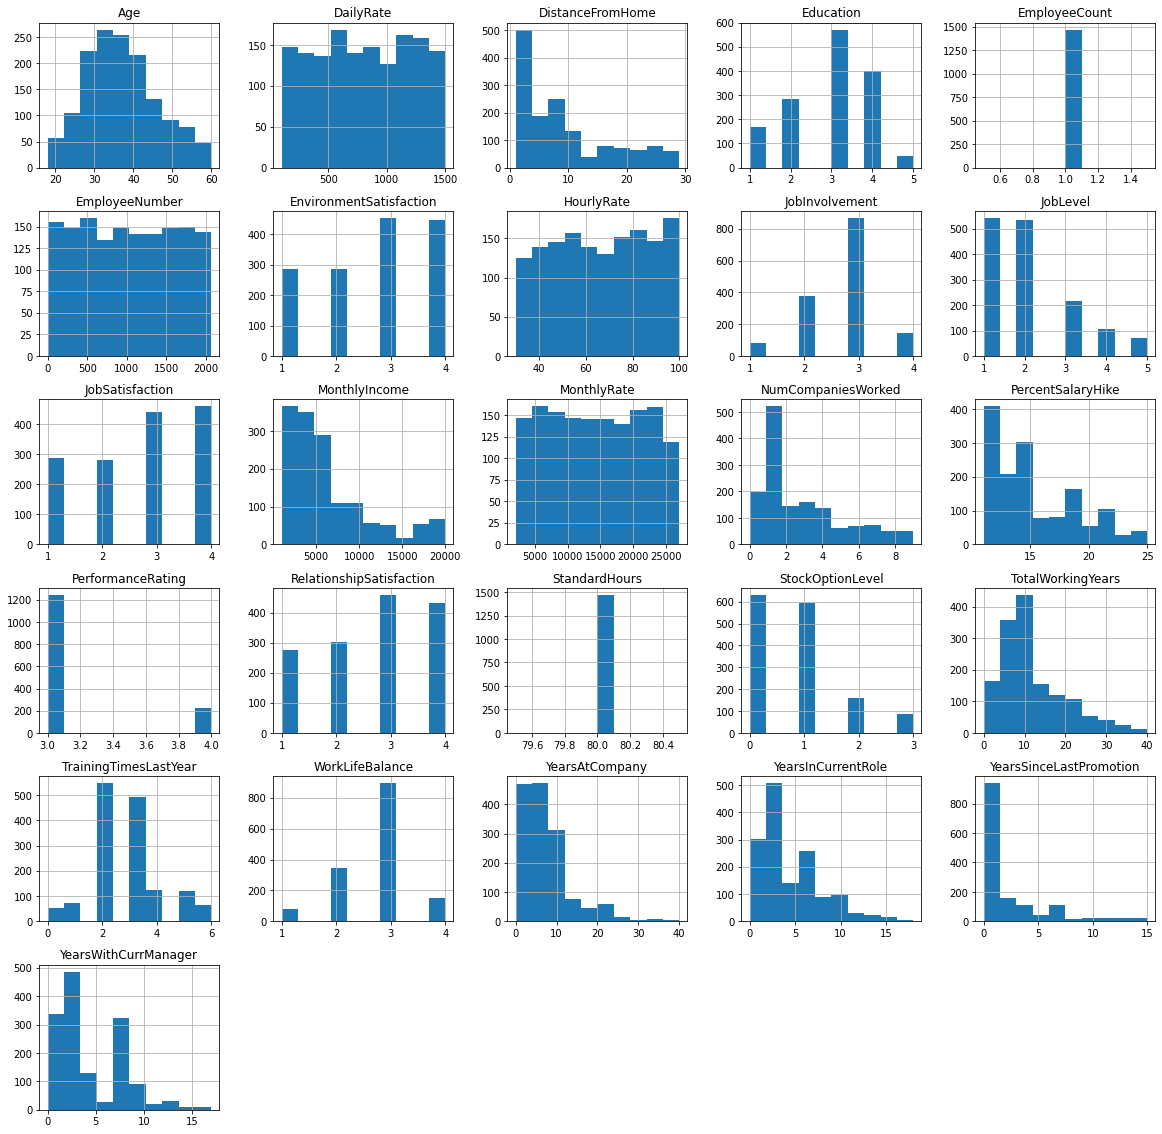

In [ ]:
df_HR.hist(figsize=(20,20))
plt.show() #Overview of the features in dataset

In [ ]:
df_HR['Attrition'].value_counts() #Attrition count

No     1233
Yes     237
Name: Attrition, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


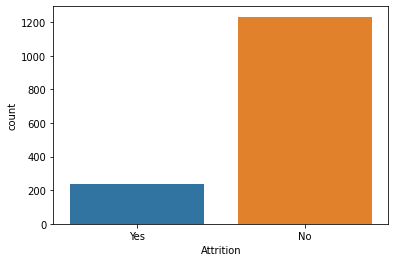

In [ ]:
import seaborn as sns
sns.countplot(df_HR['Attrition']) #View of Attrition count

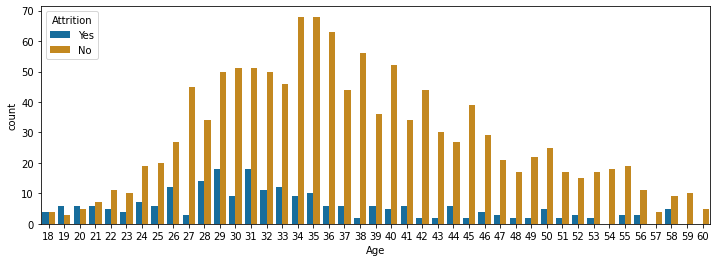

In [ ]:
plt.subplots(figsize=(12,4)) #Attrition by Age
sns.countplot(x='Age', hue = 'Attrition', data = df_HR, palette = 'colorblind')

#### Attrition By Catg. Age for the Current & Ex-employees

In [ ]:
x1=  df_HR.loc[df_HR['Attrition'] == 'No', 'Age']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes','Age']
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

from plotly.figure_factory import create_distplot

fig = create_distplot(
    hist_data, group_labels, curve_type='normal',
    show_rug=False, show_hist=False)
fig.show()

####Attrition for various ED. Bg

In [ ]:
df_HR['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [ ]:
df_EducationField = pd.DataFrame(columns=["Field", "% of Leavers"])
i=0
for field in list(df_HR['EducationField'].unique()):
  # print(field.shape)
  ratio = df_HR[(df_HR['EducationField']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['EducationField']==field].shape[0]
  # print(ratio)
  df_EducationField.loc[i] = (field, ratio*100)
  i = i+1

print(df_EducationField)

# import plotly.express as px

# fig = px.bar(df_EducationField, x=df_EducationField.Field, y='% of Leavers')
# fig.show()

              Field  % of Leavers
0     Life Sciences     14.686469
1             Other     13.414634
2           Medical     13.577586
3         Marketing     22.012579
4  Technical Degree     24.242424
5   Human Resources     25.925926


####Attrition by Job role

In [ ]:
df_HR['JobRole'].value_counts()


df_JobRole = pd.DataFrame(columns=["Job Role", "% of Leavers"])
i=0
for field in list(df_HR['JobRole'].unique()):
    ratio = df_HR[(df_HR['JobRole']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1

import plotly.express as px

fig = px.bar(df_JobRole, x='Job Role', y='% of Leavers')
fig.show()

####Average Number of Years at the company for current active employees

In [ ]:
print('Average Number of Years at the company for currently active employees: {:.2f} miles and ex-employees: {:.2f} years'.format(
    df_HR[df_HR['Attrition'] == 'No']['YearsAtCompany'].mean(), df_HR[df_HR['Attrition'] == 'Yes']['YearsAtCompany'].mean()))

####Average Number of Years at the company for current vs Ex-employees

In [ ]:
print(df_HR[df_HR['Attrition'] == 'No']['YearsAtCompany'].mean()) #Avg of Years at the company for currently employees
print(df_HR[df_HR['Attrition'] == 'Yes']['YearsAtCompany'].mean()) #Avg of Years at the company for Ex-employees

print(df_HR['YearsAtCompany'].min()) #Min and Max No. of years in company
print(df_HR['YearsAtCompany'].max())

7.369018653690187
5.1308016877637135
0
40


####Plot for Avg of Years at the company for current active employees

In [ ]:
# Years at company
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'YearsAtCompany']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsAtCompany']
hist_data = [x1,x2]
group_labels = ['Current Employees', 'Ex-Employees']

fig = create_distplot(
    hist_data, group_labels, curve_type='kde',
    show_rug=False, show_hist=False)
fig.show()

####Plot for Years at current role

In [ ]:
#Number of Years in Current Role
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'YearsInCurrentRole']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsInCurrentRole']
hist_data = [x1, x2]
group_labels = ['Current Employees', 'Ex-Employees']

fig = create_distplot(
    hist_data, group_labels, curve_type='kde',
    show_rug=False, show_hist=False)
fig.show()

####Plot for Years Since Last Promotion

In [ ]:
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'YearsSinceLastPromotion']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsSinceLastPromotion']
hist_data = [x1, x2]
group_labels = ['Current Employees', 'Ex-Employees']

fig = create_distplot(
    hist_data, group_labels, curve_type='kde',
    show_rug=False, show_hist=False)
fig.show()

####Plot for Total Years at the company

In [ ]:
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'TotalWorkingYears']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'TotalWorkingYears']

hist_data = [x1, x2]
group_labels = ['Current Employees', 'Ex-Employees']

fig = create_distplot(
    hist_data, group_labels, curve_type='kde',
    show_rug=False, show_hist=False)
fig.show()

####Plot for Monthly Income

In [ ]:
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'MonthlyIncome']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'MonthlyIncome']

hist_data = [x1, x2]
group_labels = ['Current Employees', 'Ex-Employees']

fig = create_distplot(
    hist_data, group_labels, curve_type='kde',
    show_rug=False, show_hist=False)
fig.show()

####**Summary:**

###### 1. Attrition rate is high for employees with age range of 28-31
###### 2. Sales Rep, Lab technicians have more % of leavers
##### 3. People with Avg of 3 yrs in Org. see more attrition
##### 4. Employees with 2 yrs in same role tend to leave when compared to others
##### 5. People with 5-7 Years exp tend to leave more
##### 6. People with Income less then or equal to 3k see an incease in attrition


